# Binarize Image of Bear Glacier

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

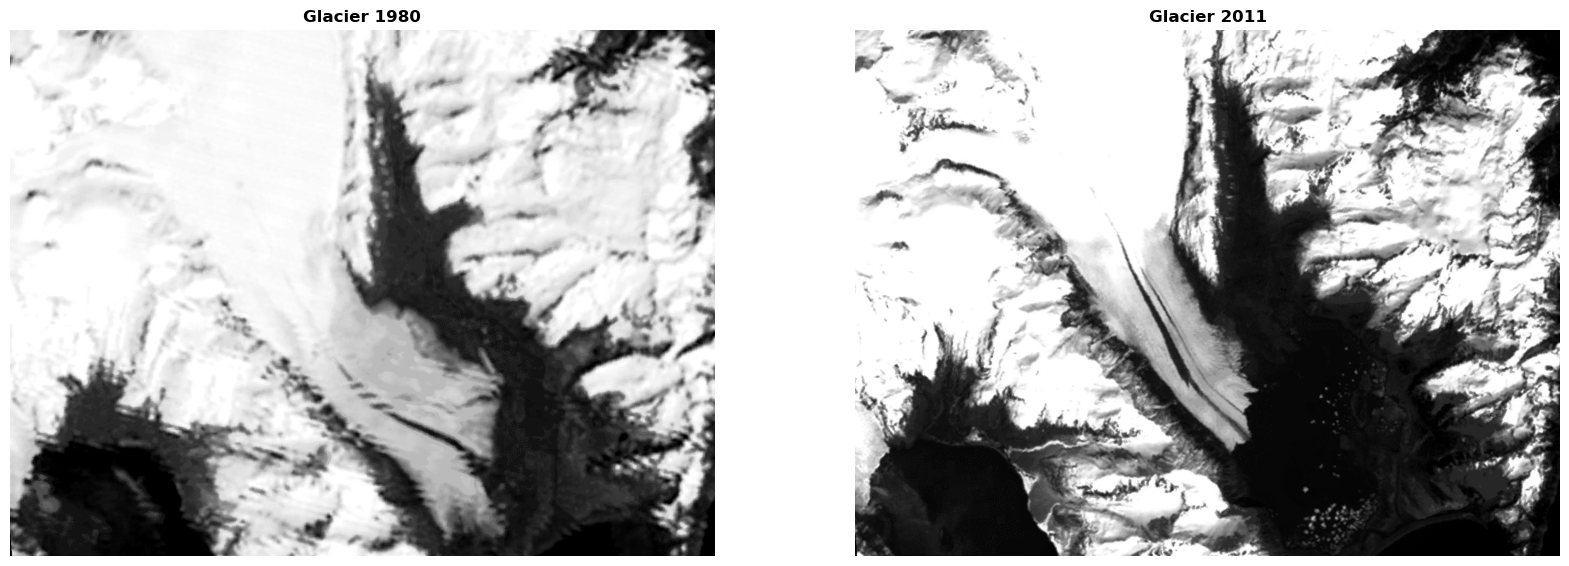

In [2]:
glacier_1980 = cv2.imread('./images/bearGlacier1980.png') # By default converts image to the 3 channel BGR color image
glacier_1980 = cv2.cvtColor(glacier_1980, cv2.COLOR_BGR2GRAY) # Converts an image from one color space to another

glacier_2011 = cv2.imread('./images/bearGlacier2011.png') # By default converts image to the 3 channel BGR color image
glacier_2011 = cv2.cvtColor(glacier_2011, cv2.COLOR_BGR2GRAY) # Converts an image from one color space to another

fig, axs = plt.subplots(1, 2, figsize=(20, 20))
axs[0].imshow(glacier_1980, cmap='gray')
axs[0].set_title('Glacier 1980')
axs[0].axis("off")
axs[1].imshow(glacier_2011, cmap='gray')
axs[1].set_title('Glacier 2011')
axs[1].axis("off")
plt.show()

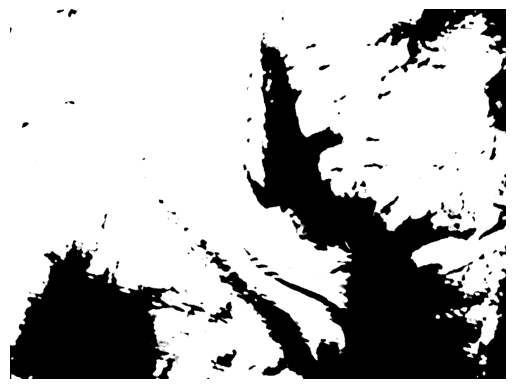

In [3]:
_, binary_1980 = cv2.threshold(glacier_1980, 127, 255, cv2.THRESH_OTSU) # https://en.wikipedia.org/wiki/Otsu%27s_method
plt.imshow(binary_1980, cmap='gray')
plt.axis("off")
plt.show()

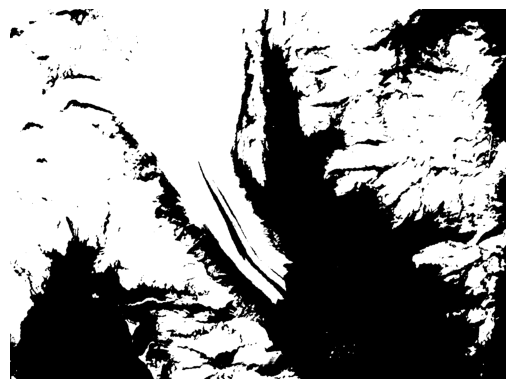

In [4]:
_, binary_2011 = cv2.threshold(glacier_2011, 127, 255, cv2.THRESH_OTSU) # https://en.wikipedia.org/wiki/Otsu%27s_method
plt.imshow(binary_2011, cmap='gray')
plt.axis("off")
plt.show()

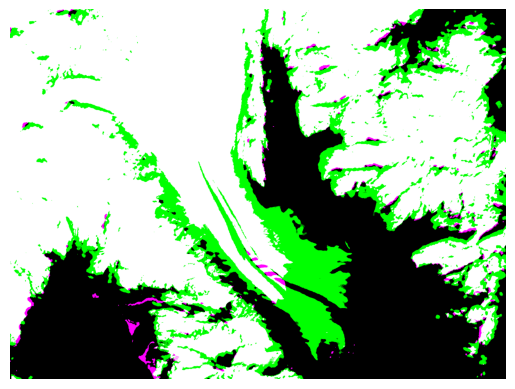

In [5]:
diff_ice = np.dstack((binary_2011, binary_1980, binary_2011))
plt.imshow(diff_ice)
plt.axis("off")
plt.show()

Unlike with grayscale images, there is no variation in the intensities of the green and magenta pixels. Green means a pixel was included in the first image but not the second, and magenta means a pixel was included in the second image but not the first.

A more accurate way to estimate glacial melt is to calculate the percent change of ice in the image. To calculate the percent change in ice, first count pixels that have been identified as ice in each image, then calculate the percent change.

In [6]:
ice_amount_1980 = np.count_nonzero(binary_1980)
ice_amount_2011 = np.count_nonzero(binary_2011)
melted_ice = (ice_amount_2011 - ice_amount_1980) / ice_amount_1980 * 100
print(f"Percent of melted ice: {melted_ice:.2f}%")

Percent of melted ice: -18.83%
